<a href="https://colab.research.google.com/github/Haniye-Rj/SalaryEstimation/blob/main/Salary-Estimation-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project objective**
The goal is to estimate the salary based on the relavent metrics (Rating, Job title, Location, etc.,)

In [ ]:
from google.colab import files
uploaded= files.upload ()

Saving df.csv to df.csv


In [ ]:
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [ ]:
df= pd.read_csv ('df.csv')

# Data Frame overview  

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


The plan is to clean the columns based on the need.


*   Salary estimate column will be convert to average salary and only number,
*   Job titles columns will be categorized.
*   Location lolumn will be by states
*   Ranking to be cleaned of negative value

The rest probably will be dropped.


# Cleaning the Salary Estimate column

In [ ]:
# The goal is to have the number in this column

In [ ]:
def dollar_remover(a):
  a=a.replace('$', '')
  return(a)

In [ ]:
df['Salary Estimate']

,Salary Estimate
0,$111K-$181K (Glassdoor est.)
1,$111K-$181K (Glassdoor est.)
2,$111K-$181K (Glassdoor est.)
3,$111K-$181K (Glassdoor est.)
4,$111K-$181K (Glassdoor est.)
...,...
5887,$42K - $76K (Glassdoor est.)
5888,-1
5889,-1
5890,-1


In [ ]:
df['Salary Estimate']= df['Salary Estimate'].apply(dollar_remover)

In [ ]:
def k_remover(a):
    a=a.replace('K', '')
    return(a)

In [ ]:
df['Salary Estimate']= df['Salary Estimate'].apply(k_remover)

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111-181 (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111-181 (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111-181 (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111-181 (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111-181 (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,42 - 76 (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


In [ ]:
# salary can not be negative value

In [ ]:
df= df[df['Salary Estimate']!= '-1']

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111-181 (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111-181 (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111-181 (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111-181 (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111-181 (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5882,Supervisory Research Health Scientist,47 - 89 (Glassdoor est.),4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable
5883,Senior SAS Programmer (Scientist),66 - 113 (Glassdoor est.),4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable
5886,Senior Data Analyst - Product Analytics (open ...,67 - 111 (Glassdoor est.),4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD)
5887,Manufacturing Data Analyst Engineer,42 - 76 (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable


In [ ]:
df['Salary Estimate']

,Salary Estimate
0,111-181 (Glassdoor est.)
1,111-181 (Glassdoor est.)
2,111-181 (Glassdoor est.)
3,111-181 (Glassdoor est.)
4,111-181 (Glassdoor est.)
...,...
5882,47 - 89 (Glassdoor est.)
5883,66 - 113 (Glassdoor est.)
5886,67 - 111 (Glassdoor est.)
5887,42 - 76 (Glassdoor est.)


In [ ]:
# we do not care about salary per our, we consider the full time contracts

In [ ]:
df=df[~df['Salary Estimate'].str.contains('Per Hour')]

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111-181 (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111-181 (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111-181 (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111-181 (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111-181 (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,38 - 64 (Glassdoor est.),3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD)
5882,Supervisory Research Health Scientist,47 - 89 (Glassdoor est.),4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable
5883,Senior SAS Programmer (Scientist),66 - 113 (Glassdoor est.),4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable
5886,Senior Data Analyst - Product Analytics (open ...,67 - 111 (Glassdoor est.),4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD)


In [ ]:
df['Salary Estimate'][0].split()[0]

'111-181'

In [ ]:
def splitter(a):
  a=a.split('-')
  return(a)


In [ ]:
df['Salary Estimate']= df['Salary Estimate'].apply(splitter)

<ipython-input-20-dca98a868b26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate']= df['Salary Estimate'].apply(splitter)


In [ ]:
df['Salary Estimate']

,Salary Estimate
0,"[111, 181 (Glassdoor est.)]"
1,"[111, 181 (Glassdoor est.)]"
2,"[111, 181 (Glassdoor est.)]"
3,"[111, 181 (Glassdoor est.)]"
4,"[111, 181 (Glassdoor est.)]"
...,...
5881,"[38 , 64 (Glassdoor est.)]"
5882,"[47 , 89 (Glassdoor est.)]"
5883,"[66 , 113 (Glassdoor est.)]"
5886,"[67 , 111 (Glassdoor est.)]"


In [ ]:
def ave(a):
  amin = int(a[0])
  amax = int(a[1].split('(')[0])
  return (amax+amin)/2

In [ ]:
df['ave']= df['Salary Estimate'].apply(ave)

<ipython-input-23-989e5a0944fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ave']= df['Salary Estimate'].apply(ave)


In [ ]:

df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,ave
0,Senior Data Scientist,"[111, 181 (Glassdoor est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,146.0
1,"Data Scientist, Product Analytics","[111, 181 (Glassdoor est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,146.0
2,Data Science Manager,"[111, 181 (Glassdoor est.)]",-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,146.0
3,Data Analyst,"[111, 181 (Glassdoor est.)]",3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,146.0
4,"Director, Data Science","[111, 181 (Glassdoor est.)]",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,"[38 , 64 (Glassdoor est.)]",3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),51.0
5882,Supervisory Research Health Scientist,"[47 , 89 (Glassdoor est.)]",4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,68.0
5883,Senior SAS Programmer (Scientist),"[66 , 113 (Glassdoor est.)]",4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,89.5
5886,Senior Data Analyst - Product Analytics (open ...,"[67 , 111 (Glassdoor est.)]",4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),89.0


In [ ]:
df.to_csv('updated.csv')

In [ ]:
files.download('updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cleaning location and rating column

In [ ]:
def state(a):
  a= a.split()
  a= a[-1]
  return(a)

In [ ]:
df['state']= df['Location'].apply(state)

<ipython-input-28-3f7a47ca2fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state']= df['Location'].apply(state)


In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,ave,state
0,Senior Data Scientist,"[111, 181 (Glassdoor est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,146.0,NY
1,"Data Scientist, Product Analytics","[111, 181 (Glassdoor est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,146.0,NY
2,Data Science Manager,"[111, 181 (Glassdoor est.)]",-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,146.0,NY
3,Data Analyst,"[111, 181 (Glassdoor est.)]",3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,146.0,NJ
4,"Director, Data Science","[111, 181 (Glassdoor est.)]",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,146.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Information Scientist,"[38 , 64 (Glassdoor est.)]",3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),51.0,OH
5882,Supervisory Research Health Scientist,"[47 , 89 (Glassdoor est.)]",4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,68.0,OH
5883,Senior SAS Programmer (Scientist),"[66 , 113 (Glassdoor est.)]",4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,89.5,OH
5886,Senior Data Analyst - Product Analytics (open ...,"[67 , 111 (Glassdoor est.)]",4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),89.0,OH


In [ ]:
df= df[df['state'] !='Kingdom']

In [ ]:
#We do not want negative value for rating

In [ ]:
df= df[df['Rating']!=-1]

# In this section the job title has been grouped and categorized

In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
Data Scientist,530
Data Analyst,296
Data Engineer,267
Senior Data Scientist,117
Machine Learning Engineer,55
...,...
"Senior Data Analyst, Insights & Analytics Team [Customer Operations]",1
"Global Business Intelligence Analyst, Supply Chain & Operations",1
"Data Analyst, Quality Management Systems",1


In [ ]:
def title_categorizer(x):
  x=x.lower()
  if  'data scientist' in x or 'data scientist' in x:
   return 'Data Scientist'
  elif 'sata analyst' in x or 'data analysis' in x:
    return 'data analyst'
  elif 'data engineer' in x:
    return 'data engineer'
  elif 'business intelligence' in x:
    return 'business intelligence'
  elif 'machine learning' in x:
    return 'machine learning'
  else:
    return 'other'


In [ ]:
df['Job Title']= df['Job Title'].apply(title_categorizer)

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,ave,state
0,Data Scientist,"[111, 181 (Glassdoor est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,146.0,NY
1,Data Scientist,"[111, 181 (Glassdoor est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,146.0,NY
3,other,"[111, 181 (Glassdoor est.)]",3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,146.0,NJ
4,other,"[111, 181 (Glassdoor est.)]",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,146.0,NY
5,Data Scientist,"[111, 181 (Glassdoor est.)]",2.9,IFG Companies\n2.9,"New York, NY",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,146.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,other,"[38 , 64 (Glassdoor est.)]",3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),51.0,OH
5882,other,"[47 , 89 (Glassdoor est.)]",4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,68.0,OH
5883,other,"[66 , 113 (Glassdoor est.)]",4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,89.5,OH
5886,other,"[67 , 111 (Glassdoor est.)]",4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),89.0,OH


In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
other,2274
Data Scientist,1585
data engineer,765
machine learning,170
business intelligence,95
data analyst,2


# Final data frame

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'ave', 'state'],
      dtype='object')

In [ ]:
#Dropping the columns that are not important for us

In [ ]:
df= df.drop (columns= ['Salary Estimate','Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue'])

In [ ]:
df

,Job Title,Rating,ave,state
0,Data Scientist,3.5,146.0,NY
1,Data Scientist,4.5,146.0,NY
3,other,3.4,146.0,NJ
4,other,3.4,146.0,NY
5,Data Scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,other,4.0,89.0,OH


In [ ]:
df.describe()

,Rating,ave
count,4891.000000,4891.000000
mean,3.817011,106.082192
std,0.577004,35.749097
min,1.000000,37.500000
25%,3.500000,77.500000
50%,3.800000,102.000000
75%,4.100000,130.000000
max,5.000000,268.000000


<Axes: xlabel='Rating'>

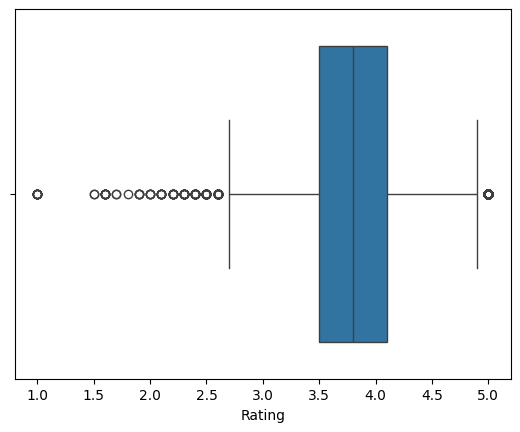

In [ ]:
sns.boxplot(x='Rating', data=df)

<Axes: xlabel='Rating', ylabel='ave'>

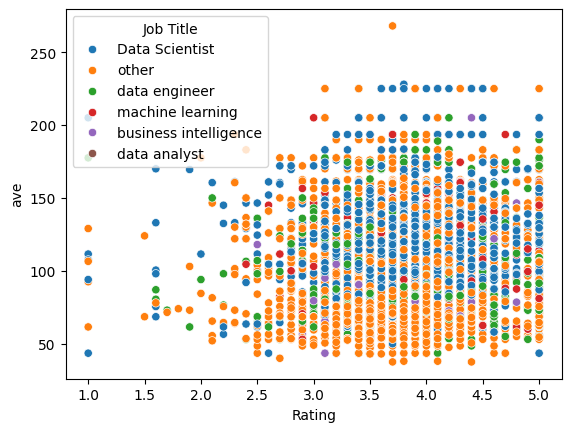

In [ ]:
sns.scatterplot(x='Rating', y='ave', data= df , hue='Job Title')

In [ ]:
other = df[df['Job Title']=='other']

In [ ]:
other

,Job Title,Rating,ave,state
3,other,3.4,146.0,NJ
4,other,3.4,146.0,NY
6,other,4.4,146.0,NY
8,other,5.0,146.0,NY
9,other,4.8,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,other,4.0,89.0,OH


# Feature engineering

In [ ]:
df= pd.get_dummies(df, columns=['Job Title','state'], dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rating                           4891 non-null   float64
 1   ave                              4891 non-null   float64
 2   Job Title_Data Scientist         4891 non-null   int64  
 3   Job Title_business intelligence  4891 non-null   int64  
 4   Job Title_data analyst           4891 non-null   int64  
 5   Job Title_data engineer          4891 non-null   int64  
 6   Job Title_machine learning       4891 non-null   int64  
 7   Job Title_other                  4891 non-null   int64  
 8   state_AZ                         4891 non-null   int64  
 9   state_CA                         4891 non-null   int64  
 10  state_DC                         4891 non-null   int64  
 11  state_DE                         4891 non-null   int64  
 12  state_FL                 

In [ ]:
df.to_csv('preprocessed_df.csv', index= False)

In [ ]:
df['ave'].median()

102.0

In [ ]:
def sat(a):
  if x>= 102:
    return (1),
  else:
      return(0)



In [ ]:
X = df.drop(columns = 'ave')

In [ ]:
y = df['ave']

# Linear Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
Lr = LinearRegression()

In [ ]:
Lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
prediction= Lr.predict(x_test)

In [ ]:
prediction

array([ 93.22285994, 123.56621506,  94.36765026,  77.34623312,
        99.29657784, 124.73993255,  94.36765026,  83.86683669,
       107.50560293, 129.56070757,  77.03026302, 139.83408104,
        97.8190882 ,  87.51389421,  97.8190882 ,  97.42784904,
        97.36010419, 137.63034145,  94.23019088, 109.76794807,
       139.63846146,  90.38751377, 125.52241088, 124.88362794,
        92.02021527,  78.00836093,  93.58517193, 108.41944248,
        93.91215274, 125.52241088,  97.00478936, 124.34869338,
        91.04211736,  98.40594695,  84.84472486, 122.97935631,
        99.18842528, 112.58342778,  91.62897611, 100.14267553,
       123.12305171, 119.05363162, 107.11436377,  88.6876117 ,
        80.41518901, 124.93555213,  79.82833026, 124.73993255,
       100.29788441, 117.18594301, 150.09754342, 104.11232519,
       138.41281978,  88.29637254, 107.70122251,  92.8026936 ,
       138.85598313,  99.57966444,  97.98288727, 107.44134457,
       129.36508798, 137.36323198,  93.38955235, 123.76

In [ ]:
y_test

,ave
4607,82.0
3136,156.5
2694,70.5
4633,65.5
4490,127.0
...,...
1075,132.5
460,176.0
1134,53.5
4759,64.0


In [ ]:
residual=y_test - prediction

In [ ]:
residual

,ave
4607,-11.222860
3136,32.933785
2694,-23.867650
4633,-11.846233
4490,27.703422
...,...
1075,39.110448
460,46.634912
1134,-36.955259
4759,-12.954994


<ipython-input-60-2bd8adca7f10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=20)


<Axes: xlabel='ave', ylabel='Density'>

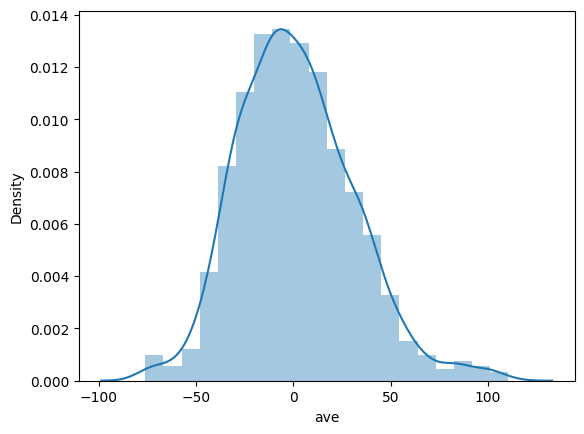

In [ ]:
sns.distplot(residual,bins=20)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))


MAE 23.497127381171865
MSE 892.6741348864775


In [ ]:
pickle.dump(Lr, open('model.pkl', 'wb'))